In [1]:
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns 
import numpy as np
import re
import random

In [2]:
df=pd.read_csv("./data/twitter/training.1600000.processed.noemoticon.csv")

In [3]:
df.columns

Index(['sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [4]:
df.shape

(1600000, 6)

In [5]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

In [6]:
df['sentiment'].unique()

array([0, 4])

<Axes: xlabel='sentiment', ylabel='count'>

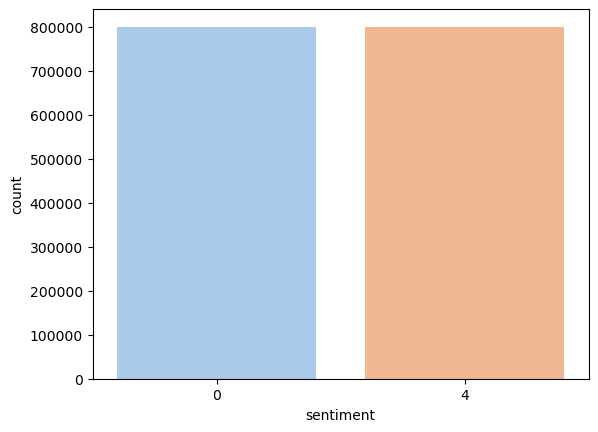

In [7]:
# balanced data set
sns.countplot(x='sentiment', data=df, palette='pastel')

In [8]:
df.sample(10)

,sentiment,id,date,query,user,text
1059934,4,1963330657,Fri May 29 12:33:39 PDT 2009,NO_QUERY,_spell,@_Erin_Nicole_ 'Jersey' was the correct spelli...
646446,0,2236520010,Fri Jun 19 03:54:56 PDT 2009,NO_QUERY,I_Want_One,Rudy is not coming back this week.... Them t...
1539511,4,2180152433,Mon Jun 15 10:04:51 PDT 2009,NO_QUERY,TomboyTigress,@jewelgiroux awwwww well ::sigh:: I *guess* I ...
1525187,4,2176836828,Mon Jun 15 04:52:13 PDT 2009,NO_QUERY,orpheus1song,@Cafana989 omg we have almost the same name XD...
1204156,4,1986216628,Sun May 31 18:30:22 PDT 2009,NO_QUERY,poeticmindset,@PryncessPoetiq thanks
55822,0,1685213823,Sat May 02 23:28:53 PDT 2009,NO_QUERY,kentz,made it to salt lake... Just drove through wha...
1417402,4,2057586892,Sat Jun 06 13:16:52 PDT 2009,NO_QUERY,TWANI_E,"@L_Star22 lmao i luv u gul, for u saved my lif..."
884157,4,1686252043,Sun May 03 04:33:17 PDT 2009,NO_QUERY,torilovesbradie,@Broooooke_ :O now way! me too. One Step Close...
1083220,4,1968823515,Fri May 29 22:18:17 PDT 2009,NO_QUERY,Milyusha,@malcolm_rogers mall cop was the movie on the ...
1416538,4,2057423591,Sat Jun 06 12:58:47 PDT 2009,NO_QUERY,heatherforeal,shopping with my ladies @shwayzted @sydneyohh...


In [9]:
df.reset_index(inplace=True) 

In [10]:
train_data=df[['sentiment','text']]

In [11]:
train_data.sample(10)

,sentiment,text
853104,4,@douglasbass I supose no other restaurant woul...
669526,0,@MrBloomingdale 15 to go . . . slow day for or...
247145,0,@realadulttalk THEY DON'T LOVE ME
25263,0,@billbeckett That's kind of near me in a way. ...
466683,0,@jkmustard yah but its just a matter of knowin...
260104,0,@MissRed187 sorry about this weekend. Had issu...
956656,4,went apartment hopping with Jessi. I love my s...
1283443,4,@limic guck mal: http://a380.lufthansa.com/#de...
826817,4,"@MaryBethune And I'm happy to be in your arms,..."
781872,0,talk to drew for a few mins he sooo sad i dun...


In [12]:
X=df['text']

In [13]:
X.shape

(1600000,)

In [14]:
y=df['sentiment']

In [15]:
y.shape

(1600000,)

In [16]:
X.sample(10),y.sample(10)

(427251     @StewartKris Kristen! Please follow me.  I rea...
 1069571                         DDR with big D  he'll yeah!!
 615030     OMG! @HerFection and I wanted to grab you as y...
 647502     Can somebody send me and @ reply or direct mes...
 830242                            showetime. then more HP  x
 1091319    akojen @ellyhart @justamoochin @bobwcaincom Th...
 358143     @lukeunabomber tea, shower, pak bags, drive 2 ...
 1262398                                 @KoolJeffrey softy. 
 1310739                     @wheelyweb thx - will follow up 
 806575                          HAve a great day my friends 
 Name: text, dtype: object,
 424005     0
 268828     0
 804041     4
 1084376    4
 839358     4
 475097     0
 79558      0
 829865     4
 590839     0
 387610     0
 Name: sentiment, dtype: int64)

In [17]:
# choose a small data set for your functioning
from sklearn.model_selection import train_test_split
X,_,y,_=train_test_split(X,y,test_size=.98)

In [18]:
print(X,y)

268380     I'm starting to dislike 1234 by Plain White T'...
605385                         omg!!!! why is it raining.?. 
141368     but its also a sad day for some seniors it wil...
203767                        @Teamsame awww. What's wrong? 
1109986    wow. White Horse on MTV also. yey. Taylor Swift! 
                                 ...                        
814437     i found a shoe in my purse this morning.. hm. ...
684495         @WAHMoms  If only!  No sleep in this morning 
957509     When Bears Meet the Modern World ..   http://b...
1070893    Thanks to @drjulieann for the free chocolate l...
553639                                           is at work 
Name: text, Length: 32000, dtype: object 268380     0
605385     0
141368     0
203767     0
1109986    4
          ..
814437     4
684495     0
957509     4
1070893    4
553639     0
Name: sentiment, Length: 32000, dtype: int64


In [19]:
X.shape,y.shape

((32000,), (32000,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [21]:
X_train.shape

(22400,)

In [22]:
y_train.shape

(22400,)

# Preprocess the data

In [23]:
nlp=spacy.load('en_core_web_sm')

In [24]:
nlp

In [25]:
pattern = r'[@&]\w+'
word_List=[]
def preprocess(sentence):
    lower_sentence = sentence.lower()
    without_dot = lower_sentence.replace(".","")
    without_tweet_username = re.sub(pattern, ' ', without_dot)
    tokens = []
    tokens = [token.lemma_ for token in nlp(without_tweet_username) if not (token.is_stop or token.like_num or token.like_email or token.like_url or token.is_punct or token.is_space or len(token)==1)]
    word_List.extend(tokens)
    return " ".join(tokens)


In [26]:
example1=X.iloc[39]
example1

"woke up expectin to make a great breakfast...and much to my dismay all the ingredients weren't there "

In [27]:
res=preprocess(example1)
print(res)

wake expectin great breakfastand dismay ingredient


In [28]:
X_train.shape

(22400,)

In [29]:
type(X_train)
print(X_train.shape)

(22400,)


In [30]:
test=X_train.iloc[1:10]
type(test)

pandas.core.series.Series

In [31]:
result = test.apply(preprocess)


In [32]:
X_train.shape

(22400,)

In [33]:
cleaned_X_train=X_train.apply(preprocess)

In [34]:
X_train.iloc[:2],cleaned_X_train.iloc[:2],

(1456112    Ahahaha im watching gossip girl right now 
 837281                            @CuddlyAlex Thanks 
 Name: text, dtype: object,
 1456112    ahahaha watch gossip girl right
 837281                               thank
 Name: text, dtype: object)

In [35]:
word_count_display = ' '.join(cleaned_X_train.tolist())

In [36]:
type(cleaned_X_train),len(cleaned_X_train)

(pandas.core.series.Series, 22400)

In [37]:
# natural language toolkit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/udit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
frequency = nltk.FreqDist(word_List)
most_common=frequency.most_common(100)
most_common

[('go', 1621),
 ('day', 1497),
 ('good', 1464),
 ('get', 1290),
 ('work', 1208),
 ('like', 1123),
 ('love', 1065),
 ('today', 958),
 ('time', 883),
 ('not', 862),
 ('think', 827),
 ('want', 820),
 ('thank', 789),
 ('know', 788),
 ('lol', 763),
 ('miss', 761),
 ('feel', 737),
 ('need', 619),
 ('watch', 602),
 ('come', 601),
 ('night', 596),
 ('new', 595),
 ('home', 533),
 ('look', 518),
 ('hope', 515),
 ('oh', 504),
 ('morning', 496),
 ('great', 478),
 ('sleep', 477),
 ('twitter', 469),
 ('wait', 467),
 ('tomorrow', 457),
 ('bad', 454),
 ('sad', 437),
 ('wish', 437),
 ('haha', 436),
 ('to', 411),
 ('try', 409),
 ('right', 400),
 ('week', 388),
 ('sorry', 378),
 ('fun', 377),
 ('happy', 370),
 ('thing', 367),
 ('friend', 357),
 ('tonight', 352),
 ('find', 350),
 ('nice', 344),
 ('leave', 342),
 ('way', 340),
 ('well', 331),
 ('tweet', 326),
 ('hate', 319),
 ('start', 310),
 ('people', 305),
 ('bed', 304),
 ('see', 300),
 ('hey', 291),
 ('guy', 288),
 ('long', 286),
 ('follow', 280),
 ('y

In [39]:
! pip install WordCloud

In [40]:
print(word_count_display)

ahahaha watch gossip girl right thank doggie cute breed obama need watch man gooonnneee know love baby heart know time spare guitar write amazing song xxx watch important thing demetri martin think leave twit party lol welcome chill george carlin believe go year suggest intro lot common esp give yank poor performance week man san antonio get ring knick tragic hunnie  iv drug natural wow celetic win good game guy shout glen davis wit shoot sgeezy sexy tis hockey hockey hill movie award jenn watch trailer well mood haha love get homeeeee whaaaatsss goodddd squarespace need new phone father fuck useless oppose help deal physics shit love fuckwit awe cut thing hear jj status happy chesterday yaaaaaaay watch bat catch moth hedge garden light moon life well watch push boy need major boost energy computer work start act save reboot begin doze aw seth rogen james franco win suddenly hype work experience till monday friday heatwave week sweaty tube day fuck hard song ya ipod itune piss  go bed 

(-0.5, 399.5, 199.5, -0.5)

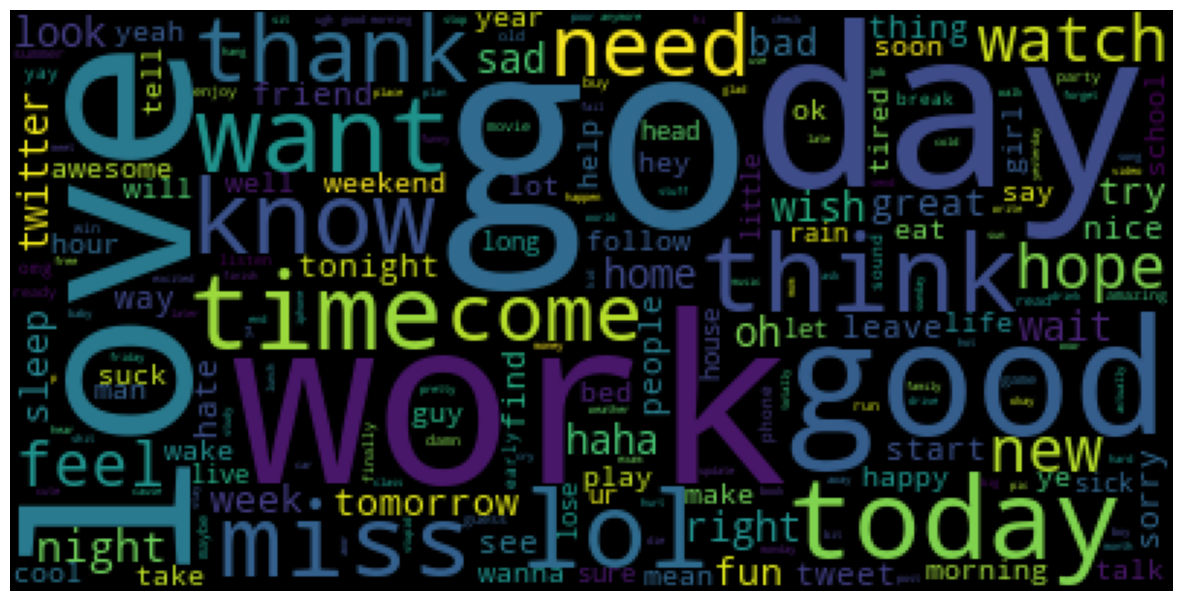

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud=WordCloud()
cloud=cloud.generate(word_count_display)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis("off")

# Language detection when you have texts of different languages in same text.

In [42]:
! pip install langdetect

In [43]:
from langdetect import detect
detect(word_count_display)

'en'

# sentiment analysis using nltk

In [44]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/udit/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
nltk_classifier = SentimentIntensityAnalyzer()


In [47]:
X_train.iloc[2],cleaned_X_train.iloc[2]

("@marjamma What's your doggie�s name? so cute... Same breed as the Obama�s ",
 'doggie cute breed obama')

In [48]:
cleaned_X_train.iloc[2]

'doggie cute breed obama'

In [49]:
nltk_classifier.polarity_scores(cleaned_X_train.iloc[2])

{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}

In [50]:
nltk_classifier.polarity_scores(X_train.iloc[2])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [51]:
nltk_classifier.polarity_scores("I hate this food")

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [52]:
X_train.iloc[104],cleaned_X_train.iloc[104]

('Its june n i can c my breathe  good old chicago',
 'june breathe good old chicago')

In [53]:
y_train.iloc[104]

4

In [54]:
nltk_classifier.polarity_scores(X_train.iloc[104]),nltk_classifier.polarity_scores(cleaned_X_train.iloc[104])

({'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404})

In [55]:
nltk_classifier.polarity_scores("He is not awesome and best but he is nice."),nltk_classifier.polarity_scores("He is not awesome, best or nice.")

({'neg': 0.288, 'neu': 0.466, 'pos': 0.246, 'compound': 0.0948},
 {'neg': 0.495, 'neu': 0.297, 'pos': 0.208, 'compound': -0.5943})

# Sentiment analysis using tfidf :- classify and check if the sentence is positive and negative

In [56]:
for sent in zip(cleaned_X_train[0:10],X_train[0:10],y_train[0:10]):
    print(sent)

('ahahaha watch gossip girl right', 'Ahahaha im watching gossip girl right now ', 4)
('thank', '@CuddlyAlex Thanks ', 4)
('doggie cute breed obama', "@marjamma What's your doggie�s name? so cute... Same breed as the Obama�s ", 4)
('need watch man gooonnneee', 'Needs to watch X-Men 2! Where has it gooonnneee? ', 0)
('know love baby heart', "@LoveAlyse you know it's all love, baby-heart. ", 4)
('know time spare guitar write amazing song xxx', '@tommcfly you know what you should do next time is you should take a spare guitar with you so you can write some amazing songs!  xxx', 4)
('watch important thing demetri martin', 'Watching important things with demetri martin ', 4)
('think leave twit party lol welcome', '@djblacknmild i thought u left the twit party lol welcome back ', 4)
('chill george carlin believe go year', "Chilling out with some George Carlin. Can't believe he's been gone for almost a year ", 0)
('suggest intro lot common esp give yank poor performance week', '@BPLewis @Brian

In [57]:
cleaned_X_train

1456112                      ahahaha watch gossip girl right
837281                                                 thank
915525                               doggie cute breed obama
73445                              need watch man gooonnneee
990677                                  know love baby heart
                                 ...                        
1160526                        rumah ranadi pusiiiiiiie huhu
1351839    bout start party thing kid las day skool aww b...
868916                                    office haha ironic
537887                                                oh bad
1514710    heterogeneity good way sure continually relati...
Name: text, Length: 22400, dtype: object

In [58]:
cleaned_X_train.shape

(22400,)

# converting word to vector or numeric representation

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(cleaned_X_train)

In [60]:
X_train_tfidf.shape

(22400, 20693)

In [61]:
cleaned_X_test = X_test.apply(preprocess)

In [62]:
cleaned_X_test

530527                       exam essentially start tomorrow
262686     haha shorten lyric yourbiggestfan update twitt...
1057338                                problemo cool guy lol
1353707     ok thanx watch home sad sad sad;this movie scary
629614     advantage thatso hard people involve ur life s...
                                 ...                        
1461448            vampire go bed megster mwahhaha love dark
861931                         hahahaha playin baseball rose
617256                                      compleately bore
329849                                            miss video
340067                                                  work
Name: text, Length: 9600, dtype: object

In [72]:
from sklearn.model_selection import train_test_split

X_train_from_tfidf,X_test_from_tfidf,y_train_from_tfidf,y_test_from_tfidf = train_test_split( X_train_tfidf,y_train,test_size=.3)

# creatre and train the model  

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [74]:
model.fit(X_train_from_tfidf,y_train_from_tfidf)

DecisionTreeClassifier()

In [75]:
y_pred= model.predict(X_test_from_tfidf)

In [78]:
from sklearn.metrics import accuracy_score
# Evaluate accuracy
accuracy = accuracy_score(y_test_from_tfidf, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 66.2797619047619%


# Sentiment analysis using the spacy library